In [ ]:
# untuk menyambungkan ke Gdrive (opsional)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
# import Training Set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
# Feature Scalling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range= (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [8]:
# Creating a Data Structure With 60 Timesteps and 1 Output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [25]:
# Import Keras Library dan Packagenya
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [10]:
# Inisiasi The RNN
regresor = Sequential()

In [11]:
# Add First LSTM layer and some Dropout Regularisation
regresor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regresor.add(Dropout(0.2))

In [12]:
# Add Second LSTM layer and some Dropout Regularisation
regresor.add(LSTM(units = 50, return_sequences = True))
regresor.add(Dropout(0.2))

In [13]:
# Add Third LSTM layer and some Dropout Regularisation
regresor.add(LSTM(units = 50, return_sequences = True))
regresor.add(Dropout(0.2))

In [14]:
# Add Four LSTM layer and some Dropout Regularisation
regresor.add(LSTM(units = 50))
regresor.add(Dropout(0.2))

In [15]:
# Adding The Output Layer
regresor.add(Dense(units = 1))

In [16]:
# Training Dataset
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [17]:
# Compiling The RNN
regresor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [26]:
# Fitting the RNN to The Training Set
regresor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 6s 166ms/step - loss: 0.0013
Epoch 2/100
38/38 [==============================] - 7s 192ms/step - loss: 0.0014
Epoch 3/100
38/38 [==============================] - 6s 154ms/step - loss: 0.0013
Epoch 4/100
38/38 [==============================] - 10s 254ms/step - loss: 0.0014
Epoch 5/100
38/38 [==============================] - 6s 169ms/step - loss: 0.0014
Epoch 6/100
38/38 [==============================] - 8s 207ms/step - loss: 0.0013
Epoch 7/100
38/38 [==============================] - 5s 129ms/step - loss: 0.0014
Epoch 8/100
38/38 [==============================] - 7s 182ms/step - loss: 0.0013
Epoch 9/100
38/38 [==============================] - 5s 134ms/step - loss: 0.0013
Epoch 10/100
38/38 [==============================] - 7s 173ms/step - loss: 0.0013
Epoch 11/100
38/38 [==============================] - 7s 186ms/step - loss: 0.0013
Epoch 12/100
38/38 [==============================] - 5s 131ms/step - loss: 0.0012
Epoch 13/100

In [19]:
# Getting Real Stock Price Of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [21]:
# Getting The Predicted Stock Price Of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60,80):
  X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regresor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 2s 2s/step


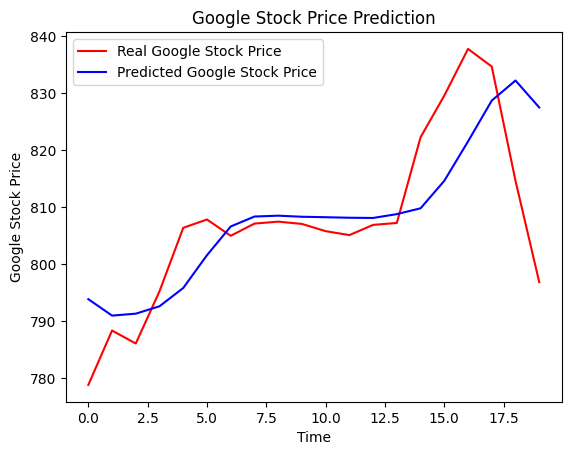

In [23]:
# Visualising the result
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()